<a href="https://colab.research.google.com/github/SiyumiJayawardhane/OralCancerEarlyDetection-DSGP/blob/Prediction-of-textual-data-I/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle

**2. Load and Inspect the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DSGP/New/new_target_dataset.csv')

In [ ]:
#Display information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64653 entries, 0 to 64652
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       64653 non-null  int64 
 1   Continent                    64653 non-null  int64 
 2   Age_group                    64653 non-null  int64 
 3   Socioeconomic_Status_High    64653 non-null  bool  
 4   Socioeconomic_Status_Low     64653 non-null  bool  
 5   Socioeconomic_Status_Middle  64653 non-null  bool  
 6   Tobacco_Use_No               64653 non-null  bool  
 7   Tobacco_Use_Yes              64653 non-null  bool  
 8   Alcohol_Use_No               64653 non-null  bool  
 9   Alcohol_Use_Yes              64653 non-null  bool  
 10  HPV_Related_No               64653 non-null  bool  
 11  HPV_Related_Yes              64653 non-null  bool  
 12  Risk_Level                   64653 non-null  object
dtypes: bool(9), int64

In [ ]:
#Load 5 rows
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
   Gender  Continent  Age_group  Socioeconomic_Status_High  \
0       0          4          0                       True   
1       1          0          2                       True   
2       1          0          2                      False   
3       0          4          1                      False   
4       0          0          0                      False   

   Socioeconomic_Status_Low  Socioeconomic_Status_Middle  Tobacco_Use_No  \
0                     False                        False           False   
1                     False                        False           False   
2                     False                         True           False   
3                     False                         True           False   
4                     False                         True           False   

   Tobacco_Use_Yes  Alcohol_Use_No  Alcohol_Use_Yes  HPV_Related_No  \
0             True           False             True            True   
1            

In [ ]:
# View the shape of dataset
print("\nDataset Shape:")
print(data.shape)


Dataset Shape:
(64653, 13)


**3.Encoded Risk Levels and Defined Target Variable**

In [ ]:
# Manually map risk level
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}
# add to thr dataset
data['Risk_Level'] = data['Risk_Level'].map(risk_mapping)

# Define y before using it
y = data['Risk_Level']

print(y.value_counts())

Risk_Level
1    25564
2    24394
0    14695
Name: count, dtype: int64


In [ ]:
data.head(10)

,Gender,Continent,Age_group,Socioeconomic_Status_High,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,Tobacco_Use_No,Tobacco_Use_Yes,Alcohol_Use_No,Alcohol_Use_Yes,HPV_Related_No,HPV_Related_Yes,Risk_Level
0,0,4,0,True,False,False,False,True,False,True,True,False,0
1,1,0,2,True,False,False,False,True,False,True,True,False,0
2,1,0,2,False,False,True,False,True,False,True,False,True,2
3,0,4,1,False,False,True,False,True,False,True,True,False,0
4,0,0,0,False,False,True,False,True,False,True,True,False,0
5,0,1,0,True,False,False,False,True,True,False,True,False,0
6,1,2,0,False,True,False,False,True,False,True,True,False,1
7,1,1,2,False,True,False,False,True,False,True,False,True,2
8,1,4,1,False,True,False,True,False,True,False,True,False,2
9,1,2,1,False,False,True,True,False,False,True,True,False,1


**4.Visualize Relationship Between features and the target variable**

Correlations with Target Column:
Gender                         0.018166
Continent                     -0.000474
Age_group                     -0.023755
Socioeconomic_Status_High     -0.108115
Socioeconomic_Status_Low       0.190708
Socioeconomic_Status_Middle   -0.099864
Tobacco_Use_No                 0.456385
Tobacco_Use_Yes               -0.456385
Alcohol_Use_No                -0.136119
Alcohol_Use_Yes                0.136119
HPV_Related_No                -0.361729
HPV_Related_Yes                0.361729
Name: Risk_Level, dtype: float64


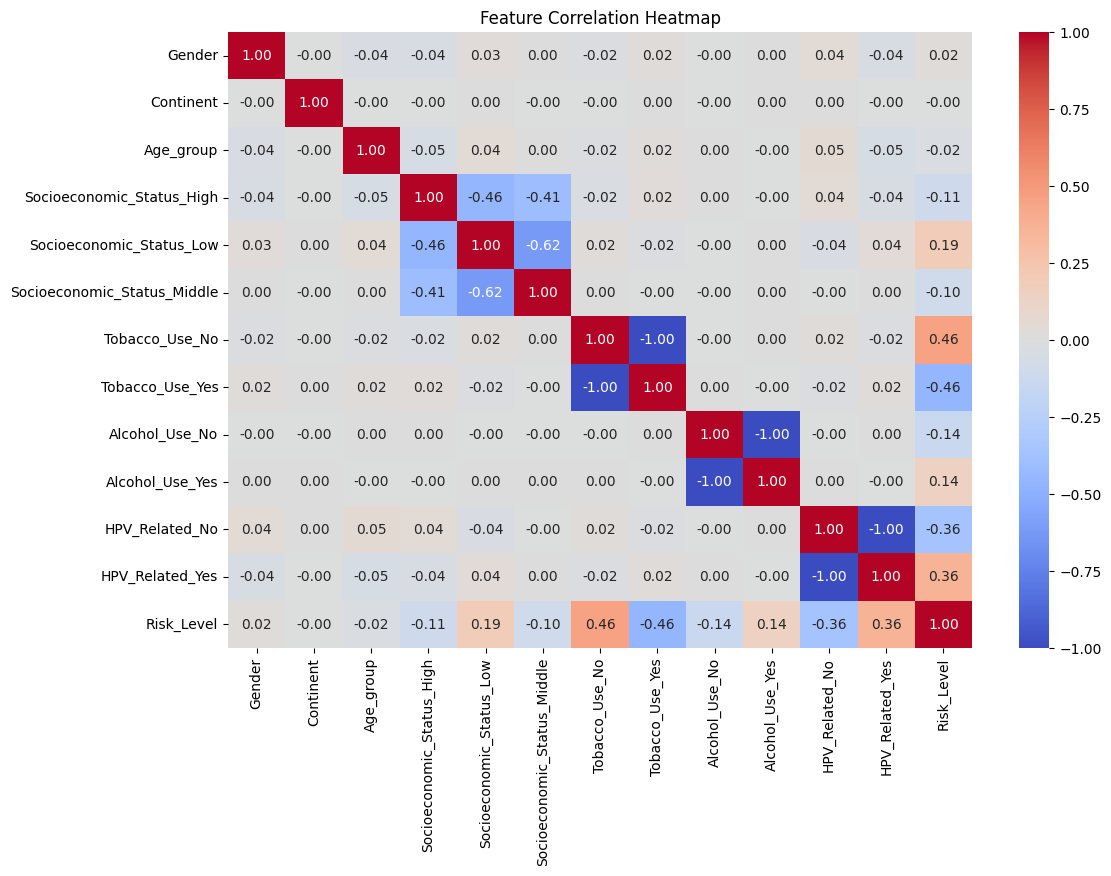

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Risk_Level' is your target column
target_column = 'Risk_Level'

# Calculate correlations with target
correlations = data.corr()[target_column].drop(target_column)  # Exclude target from the result

# Print correlations
print("Correlations with Target Column:")
print(correlations)

# Now proceed with the heatmap code
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Drop low-correlation and redundant features
data = data.drop(columns=[ 'Continent', 'Tobacco_Use_No', 'Alcohol_Use_No', 'HPV_Related_No', 'Socioeconomic_Status_High'])

**5.Remaining Feature for Model Training**

In [ ]:
# Print remaining features
print("\nRemaining features :")
print(list(data.columns))


Remaining features :
['Gender', 'Age_group', 'Socioeconomic_Status_Low', 'Socioeconomic_Status_Middle', 'Tobacco_Use_Yes', 'Alcohol_Use_Yes', 'HPV_Related_Yes', 'Risk_Level']


In [ ]:
#download feature_names.pkl file
import pickle
with open('/content/drive/MyDrive/DSGP/New/feature_names.pkl', 'wb') as file:
    pickle.dump(list(data.columns), file)

In [ ]:
X = data.drop('Risk_Level', axis=1)  # Features
y = data['Risk_Level']  # Target variable

# Now you can use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 51722
Test set size: 12931


**6. Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

with open('/content/drive/MyDrive/DSGP/New/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

**7. Train Decision Tree Classifier**


Cross-Validation Accuracy: 0.8183 ± 0.0255

Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11737
           1       0.82      0.88      0.85     20444
           2       0.86      0.72      0.78     19541

    accuracy                           0.85     51722
   macro avg       0.86      0.87      0.86     51722
weighted avg       0.85      0.85      0.85     51722


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2958
           1       0.82      0.88      0.85      5120
           2       0.85      0.71      0.78      4853

    accuracy                           0.85     12931
   macro avg       0.85      0.87      0.86     12931
weighted avg       0.85      0.85      0.84     12931



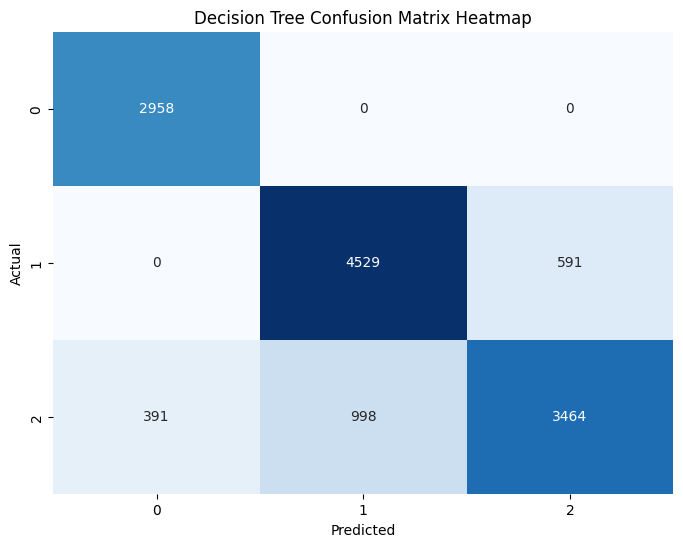

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

# Cross-validation with accuracy scoring
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Fit the model on the full training data
dt_model.fit(X_train_scaled, y_train)

# Predictions on the training set
y_train_pred = dt_model.predict(X_train_scaled)

# Predictions on the test set
y_test_pred = dt_model.predict(X_test_scaled)

# Evaluation metrics for training data
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluation metrics for testing data
print("\nTesting Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.show()

with open('/content/drive/MyDrive/DSGP/New/Decision_Tree_Classifier.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

**8. Random Forest Classifier**


Cross-Validation Accuracy: 0.9703 ± 0.0023

Random Forest Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11737
           1       1.00      1.00      1.00     20444
           2       1.00      0.92      0.96     19541

    accuracy                           0.97     51722
   macro avg       0.96      0.97      0.97     51722
weighted avg       0.97      0.97      0.97     51722


Random Forest Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2958
           1       1.00      1.00      1.00      5120
           2       1.00      0.92      0.96      4853

    accuracy                           0.97     12931
   macro avg       0.96      0.97      0.97     12931
weighted avg       0.97      0.97      0.97     12931



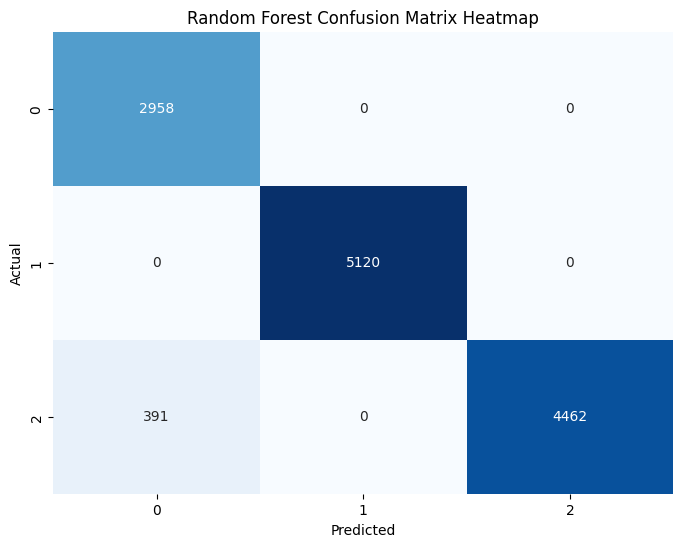

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

# Cross-validation with accuracy scoring
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Fit the model on the full training data
rf_model.fit(X_train_scaled, y_train)

# Predictions on the training set
y_train_pred = rf_model.predict(X_train_scaled)

# Predictions on the test set
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics for training data
print("\nRandom Forest Classifier Training Classification Report:")
print(classification_report(y_train, y_train_pred))

# Evaluation metrics for testing data
print("\nRandom Forest Classifier Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrix for testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.show()

with open('/content/drive/MyDrive/DSGP/New/Random_Forest_Classifier.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('/content/drive/MyDrive/DSGP/New/X_train_scaled.pkl', 'wb') as file:
    pickle.dump(X_train_scaled, file)

with open('/content/drive/MyDrive/DSGP/New/X_train.pkl', 'wb') as file:
    pickle.dump(X_train, file)


XGBoost Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11737
           1       0.94      0.83      0.88     20444
           2       0.83      0.87      0.85     19541

    accuracy                           0.88     51722
   macro avg       0.89      0.90      0.89     51722
weighted avg       0.89      0.88      0.88     51722


XGBoost Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2958
           1       0.94      0.82      0.88      5120
           2       0.82      0.86      0.84      4853

    accuracy                           0.88     12931
   macro avg       0.88      0.89      0.89     12931
weighted avg       0.88      0.88      0.88     12931



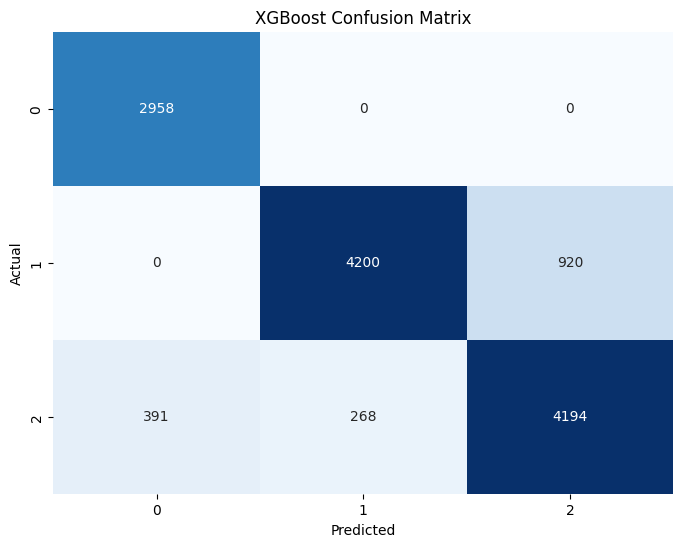

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Adjusted XGBoost hyperparameters to reduce overfitting
xgb_model = XGBClassifier(
    eval_metric='logloss',
    learning_rate=0.01,
    n_estimators=100,
    max_depth=2,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1,
    reg_lambda=1,
    random_state=42
)

# Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

print("\nXGBoost Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nXGBoost Testing Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Save the XGBoost model to a pickle file
with open('XGBoost_Classifier.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [ ]:
import pickle
import pandas as pd
import numpy as np

# --------------------- Load Required Files ---------------------
with open('/content/drive/MyDrive/DSGP/New/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

with open('/content/drive/MyDrive/DSGP/New/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

model_features = feature_names[:-1]  # Remove target from features

# Load Random Forest model
with open('/content/drive/MyDrive/DSGP/New/Random_Forest_Classifier.pkl', 'rb') as f:
    model_rf = pickle.load(f)

# Define risk level mapping
risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}

# --------------------- Function for User Input ---------------------
def get_user_input():
    """
    Collects user input and validates categorical variables for prediction.
    """
    print("\nProvide patient details:")

    # Define valid options
    valid_gender = ['Male', 'Female']
    valid_yes_no = ['Yes', 'No']
    valid_socioeconomic = ['Low', 'Middle', 'High']
    valid_age_group = ['Young', 'Middle', 'Older']

    while True:
        gender = input("Gender (Male/Female): ").strip().capitalize()
        if gender not in valid_gender:
            print("Invalid input. Please enter 'Male' or 'Female'.")
            continue

        tobacco = input("Tobacco Use? (Yes/No): ").strip().capitalize()
        if tobacco not in valid_yes_no:
            print("Invalid input. Please enter 'Yes' or 'No'.")
            continue

        alcohol = input("Alcohol Use? (Yes/No): ").strip().capitalize()
        if alcohol not in valid_yes_no:
            print("Invalid input. Please enter 'Yes' or 'No'.")
            continue

        hpv = input("HPV Related? (Yes/No): ").strip().capitalize()
        if hpv not in valid_yes_no:
            print("Invalid input. Please enter 'Yes' or 'No'.")
            continue

        socioeconomic = input("Socioeconomic Status (Low/Middle/High): ").strip().capitalize()
        if socioeconomic not in valid_socioeconomic:
            print("Invalid input. Please enter 'Low', 'Middle', or 'High'.")
            continue

        age_group = input("Age Group (Young/Middle/Older): ").strip().capitalize()
        if age_group not in valid_age_group:
            print("Invalid input. Please enter 'Young', 'Middle', or 'Older'.")
            continue

        break  # Exit loop if all inputs are valid

    # Mappings for categorical values
    gender_map = {'Male': 0, 'Female': 1}
    yes_no_map = {'Yes': 1, 'No': 0}
    socioeconomic_map = {'Low': 0, 'Middle': 1, 'High': 2}
    age_group_map = {'Young': 0, 'Middle': 1, 'Older': 2}

    user_data = {
        'Gender': gender_map[gender],
        'Age_group': age_group_map[age_group],
        'Socioeconomic_Status_Low': 1 if socioeconomic == "Low" else 0,
        'Socioeconomic_Status_Middle': 1 if socioeconomic == "Middle" else 0,
        'Tobacco_Use_Yes': 1 if tobacco == "Yes" else 0,
        'Alcohol_Use_Yes': 1 if alcohol == "Yes" else 0,
        'HPV_Related_Yes': 1 if hpv == "Yes" else 0
    }

    return user_data, gender, age_group, socioeconomic, tobacco, alcohol, hpv

# --------------------- Prediction Function ---------------------
def display_model_prediction(model, input_scaled):
    """
    Predicts risk level and displays probability scores.
    """
    probs = model.predict_proba(input_scaled)[0]
    prediction = model.predict(input_scaled)[0]
    predicted_risk = risk_mapping.get(prediction, "Unknown")

    print(f"\nPrediction Result:")
    print(f"Predicted Risk Level: {predicted_risk}")
    print("Probability Scores:")
    for i, score in enumerate(probs):
        label = risk_mapping.get(i, "Unknown")
        print(f"  {label}: {score:.4f}")

# --------------------- Process Input & Make Predictions ---------------------
input_data, gender, age_group, socioeconomic, tobacco, alcohol, hpv = get_user_input()

# Convert to DataFrame and align with model features
input_df = pd.DataFrame([input_data])
input_df = input_df.reindex(columns=model_features, fill_value=0)

# Print full vector and feature names
print("Final raw input vector passed to the model (before scaling):")
raw_vector = input_df.values.flatten().tolist()
print(raw_vector)

print("\nModel Features:")
for name, value in zip(model_features, raw_vector):
    print(f"  {name}: {value}")

# Scale the input data
input_scaled = scaler.transform(input_df)

# Predict using Random Forest model
display_model_prediction(model_rf, input_scaled)


Provide patient details:
Gender (Male/Female): Male
Tobacco Use? (Yes/No): Yes
Alcohol Use? (Yes/No): Yes
HPV Related? (Yes/No): No
Socioeconomic Status (Low/Middle/High): Low
Age Group (Young/Middle/Older): Older
Final raw input vector passed to the model (before scaling):
[0, 2, 1, 0, 1, 1, 0]

Model Features:
  Gender: 0
  Age_group: 2
  Socioeconomic_Status_Low: 1
  Socioeconomic_Status_Middle: 0
  Tobacco_Use_Yes: 1
  Alcohol_Use_Yes: 1
  HPV_Related_Yes: 0

Prediction Result:
Predicted Risk Level: Medium Risk
Probability Scores:
  Low Risk: 0.3493
  Medium Risk: 0.4997
  High Risk: 0.1510


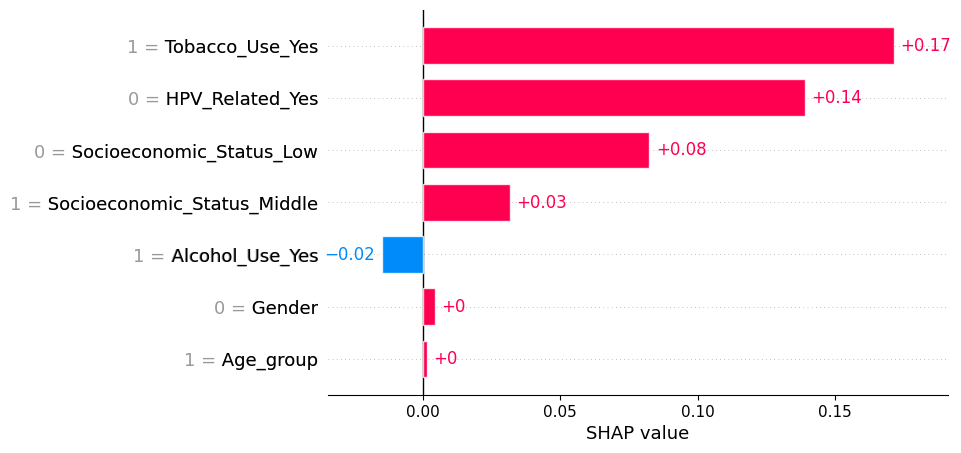

In [ ]:

import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.TreeExplainer(model_rf)

# Compute SHAP values
shap_values = explainer.shap_values(input_scaled)

# Pick the SHAP values for the predicted class (e.g., class 2 for High Risk)
predicted_class_index = model_rf.predict(input_scaled)[0]

# Correct indexing to access SHAP values for the sample and class
shap_values_class = shap_values[0, :, predicted_class_index]

# Create a SHAP values DataFrame for the input
shap_values_df = pd.DataFrame(shap_values_class.reshape(1, -1), columns=input_df.columns)

# Plot the mean SHAP values (bar plot)
shap.plots.bar(shap.Explanation(values=shap_values_class,
                                base_values=explainer.expected_value[predicted_class_index],
                                data=input_df.values[0],
                                feature_names=input_df.columns.tolist()))
plt.show()

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(input_scaled)

# Get predicted class index
predicted_class_index = model_rf.predict(input_scaled)[0]

# Create Explanation object for the force plot
explanation = shap.Explanation(
    values=shap_values[0, :, predicted_class_index],
    base_values=explainer.expected_value[predicted_class_index],
    data=input_df.iloc[0].values,
    feature_names=input_df.columns
)

# Display force plot
shap.initjs()
shap.force_plot(explanation.base_values, explanation.values, explanation.data, feature_names=explanation.feature_names)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Create the LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data=np.array(X_train),       # Use your original training data **before scaling**
    feature_names=model_features,
    class_names=["Low Risk", "Medium Risk", "High Risk"],
    mode='classification',
    discretize_continuous=True             # Optional: makes interpretation easier
)

# Explain the prediction for the single input
exp = explainer_lime.explain_instance(
    data_row=input_df.values[0],           # Unscaled, one-hot encoded input
    predict_fn=model_rf.predict_proba
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True)

# Optional: Save explanation to HTML
exp.save_to_file("lime_explanation.html")